In [1]:
%matplotlib inline
import numpy as np
x = np.random.normal(0, 0.2, 100)

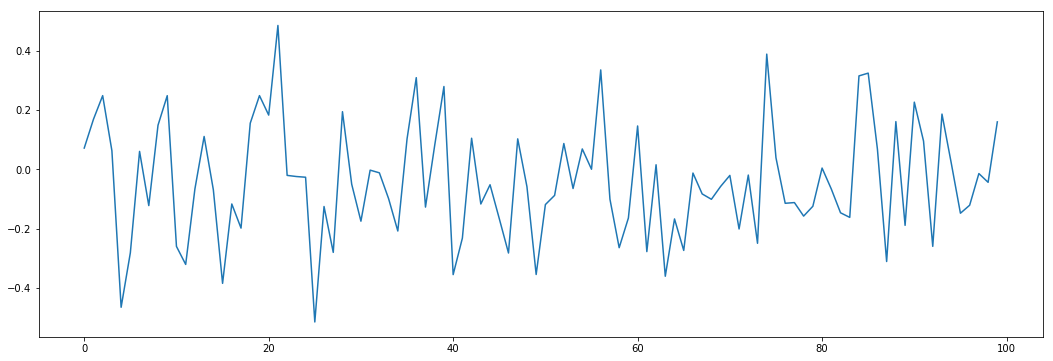

In [2]:
import pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 6
plt.plot(x)

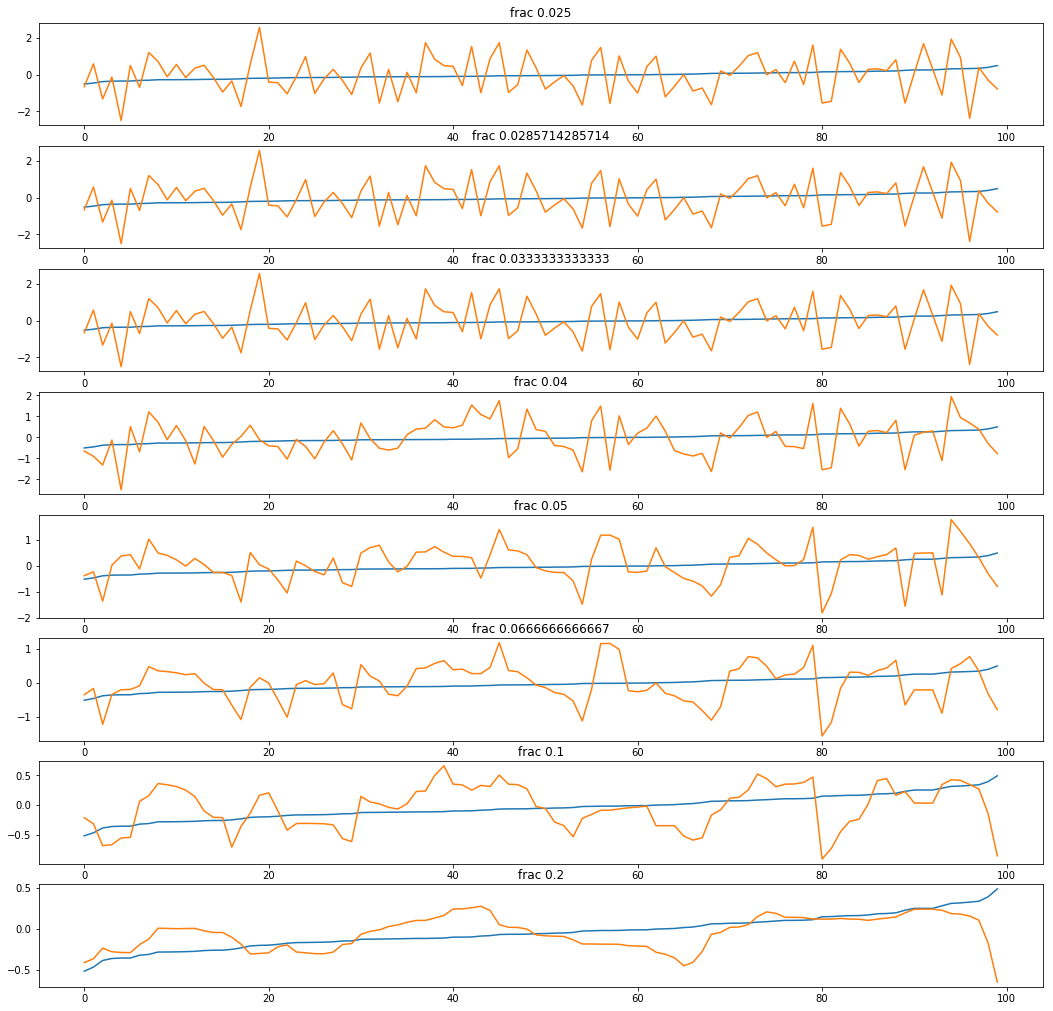

In [3]:
#http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
from statsmodels.nonparametric.smoothers_lowess import lowess
rcParams['figure.figsize'] = 18, 20
fracs = range(40, 0, -5)
y = np.sin(x) + np.random.normal(size=len(x))
for i, frac in enumerate(fracs):
    ax = plt.subplot(len(fracs) + 1, 1, i + 1)
    frac = 1./frac
    ax.set_title("frac %s"%frac)
    plt.plot(lowess(y, x, frac=frac))

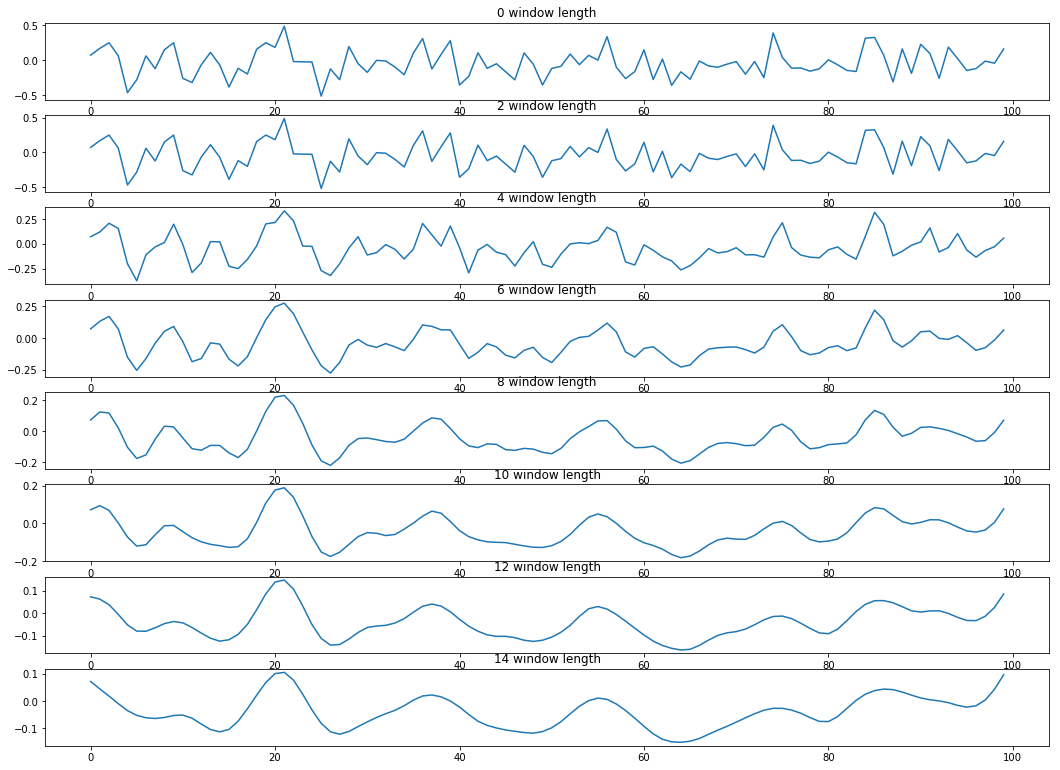

In [4]:
#https://github.com/scipy/scipy-cookbook/blob/master/ipython/SignalSmooth.ipynb
def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=np.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=np.ones(window_len,'d')
        else:  
                w=eval('np.'+window+'(window_len)')
        y=np.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]
    
rcParams['figure.figsize'] = 18, 15
window_lens = range(0, 15, 2)
for i, window_len in enumerate(window_lens):
    ax = plt.subplot(len(window_lens) + 1, 1, i + 1)
    ax.set_title("%s window length"%window_len)
    plt.plot(smooth(x, window_len))

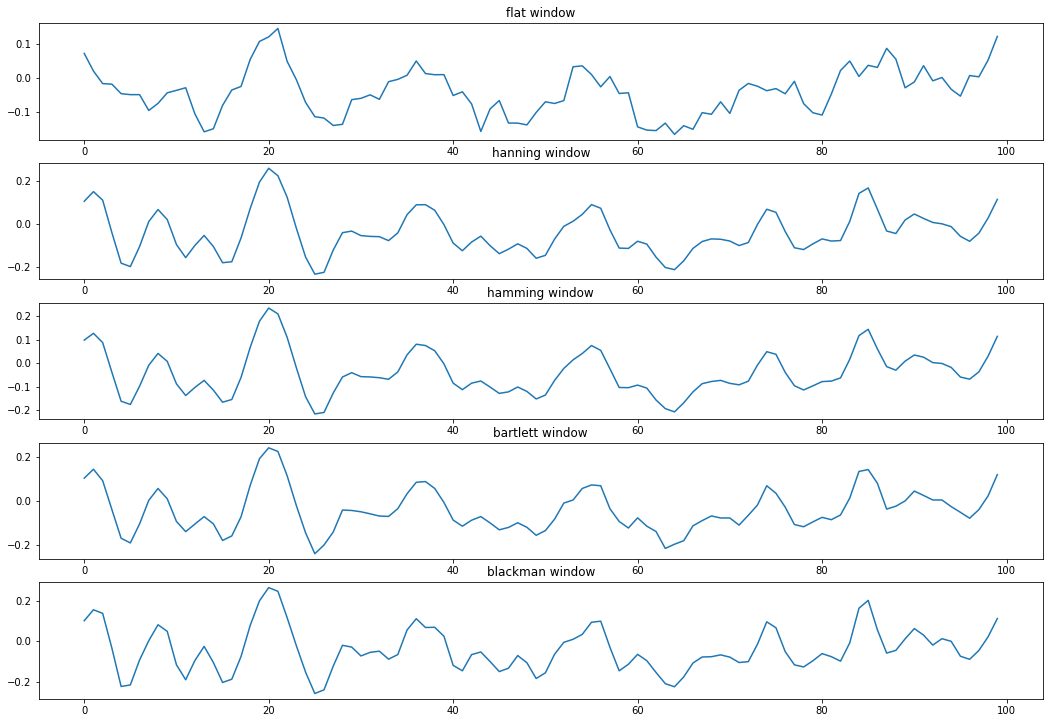

In [6]:
windows = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
for i, window in enumerate(['flat', 'hanning', 'hamming', 'bartlett', 'blackman']):
    ax = plt.subplot(len(windows) + 1, 1, i + 1)
    ax.set_title("%s window"%window)
    plt.plot(smooth(x, window_len=7, window=window))